# Linear Regression Model

Import library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

Split the data into Training Data and Test Data



*   Training Data shows how well the model learns from known data.
*   Test Data shows how well the model generalizes to new data



In [5]:
#Read the CSV Data File
df = pd.read_csv('abalone.csv')

# Visualzation

In [6]:
df.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


*   sex is a categorical feature while the Rest is a numerical Feature.
*   For me to run my linear Regression Model , i will need to One-Hot Encoding to change my categorical feature into numerical Feature

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000




*   Most of the Feature for Min,Max have different ranges and scales
*   This  means that scaling is recommanded for this dataset



In [8]:
#Get all the numerical Feature
numerical_df = df.drop('Sex', axis=1)
numerical_df.corr()['Rings']

,Rings
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole weight,0.540390
Shucked weight,0.420884
Viscera weight,0.503819
Shell weight,0.627574
Rings,1.000000


Since all correlations with Rings are positive, this show that all the feature are usefull to predict the Rings.

# **Data Preprocessing**

# Check For Null

In [9]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


# Split the Target and Feature

In [10]:
#Split the Target and Feature
X = df.drop('Rings', axis=1) # contain all the feature
y = df['Rings']              # contain the target


#Splitting the data into 2 Different part
# 70 percent of Data to training Data and 30 percent to Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle = True)

# Apply 3-sigma to Numerical Columns

In [11]:
num_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']

#Combine the Training Data
Training_Data = pd.concat([X_train, y_train], axis=1)

print("Before Apply 3-sigma to Numerical Columns:")
Training_Data.describe()

Before Apply 3-sigma to Numerical Columns:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,0.526143,0.409531,0.140128,0.836328,0.362982,0.182291,0.241286,9.983921
std,0.119723,0.098994,0.042487,0.492079,0.223530,0.109229,0.140562,3.238851
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.443750,0.187000,0.094500,0.130000,8.000000
50%,0.545000,0.425000,0.145000,0.808500,0.340000,0.173000,0.235000,10.000000
75%,0.615000,0.485000,0.165000,1.160250,0.508250,0.256000,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
#  Apply 3-sigma to Numerical Columns to the training data
outlier_mask = (np.abs(X_train[num_cols] - X_train[num_cols].mean()) <= 3 * X_train[num_cols].std()).all(axis=1)
Training_Data = Training_Data[outlier_mask]

print("After Apply 3-sigma to Numerical Columns:")
Training_Data.describe()

After Apply 3-sigma to Numerical Columns:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000
mean,0.525109,0.408644,0.139387,0.819081,0.354925,0.179142,0.236268,9.967098
std,0.114789,0.095148,0.036606,0.460554,0.207473,0.103641,0.130806,3.173270
min,0.170000,0.120000,0.025000,0.023000,0.008500,0.000500,0.005000,3.000000
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.094500,0.130000,8.000000
50%,0.545000,0.425000,0.145000,0.803500,0.336500,0.171500,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.144000,0.499500,0.250500,0.325000,11.000000
max,0.760000,0.605000,0.240000,2.238500,1.026500,0.492500,0.660000,29.000000


In [13]:
X_train = Training_Data.drop('Rings', axis=1)
y_train = Training_Data['Rings']

# Apply Scalling to all the Nurmical Feature

Before Applying Scalling

In [14]:
X_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000
mean,0.525109,0.408644,0.139387,0.819081,0.354925,0.179142,0.236268
std,0.114789,0.095148,0.036606,0.460554,0.207473,0.103641,0.130806
min,0.170000,0.120000,0.025000,0.023000,0.008500,0.000500,0.005000
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.094500,0.130000
50%,0.545000,0.425000,0.145000,0.803500,0.336500,0.171500,0.235000
75%,0.615000,0.480000,0.165000,1.144000,0.499500,0.250500,0.325000
max,0.760000,0.605000,0.240000,2.238500,1.026500,0.492500,0.660000


In [15]:
X_test.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.518979,0.404035,0.138090,0.811061,0.350943,0.176636,0.233108
std,0.120850,0.099744,0.040228,0.486163,0.218122,0.110451,0.135865
min,0.110000,0.090000,0.015000,0.008000,0.002500,0.002000,0.003000
25%,0.445000,0.346250,0.110000,0.436125,0.181625,0.091000,0.127625
50%,0.535000,0.420000,0.140000,0.774750,0.329250,0.164250,0.223750
75%,0.610000,0.475000,0.165000,1.130375,0.490000,0.245375,0.320750
max,0.800000,0.630000,0.515000,2.526000,1.232000,0.590000,0.850000


After Applying Scalling

In [16]:
num_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']

# Apply Min-Max scaling
scaler = MinMaxScaler()

#Scale all the Nurmical Feature
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000
mean,0.601879,0.595142,0.532035,0.359323,0.340300,0.363093,0.353082
std,0.194558,0.196180,0.170261,0.207878,0.203804,0.210652,0.199704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474576,0.474227,0.418605,0.190025,0.175344,0.191057,0.190840
50%,0.635593,0.628866,0.558140,0.352291,0.322200,0.347561,0.351145
75%,0.754237,0.742268,0.651163,0.505981,0.482318,0.508130,0.488550
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.591490,0.585639,0.526001,0.355703,0.336388,0.358000,0.348257
std,0.204831,0.205658,0.187106,0.219437,0.214265,0.224493,0.207427
min,-0.101695,-0.061856,-0.046512,-0.006770,-0.005894,0.003049,-0.003053
25%,0.466102,0.466495,0.395349,0.186470,0.170064,0.183943,0.187214
50%,0.618644,0.618557,0.534884,0.339314,0.315079,0.332825,0.333969
75%,0.745763,0.731959,0.651163,0.499831,0.472986,0.497713,0.482061
max,1.067797,1.051546,2.279070,1.129768,1.201866,1.198171,1.290076


# One- Hot_Encoding

In [18]:
#we use Pandas' 'get_dummies' method to create the one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Sex'], prefix='Sex')
X_test = pd.get_dummies(X_test, columns=['Sex'], prefix='Sex')

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2830,0.601695,0.639175,0.511628,0.370345,0.416503,0.364837,0.269466,True,False,False
925,0.440678,0.422680,0.348837,0.154141,0.146365,0.166667,0.152672,False,True,False
3845,0.483051,0.474227,0.372093,0.177387,0.151277,0.196138,0.213740,False,False,True
547,0.059322,0.072165,0.093023,0.008802,0.008350,0.010163,0.016031,False,False,True
2259,0.711864,0.711340,0.627907,0.486346,0.488703,0.512195,0.442748,True,False,False
...,...,...,...,...,...,...,...,...,...,...
3444,0.542373,0.577320,0.418605,0.246445,0.243124,0.268293,0.213740,True,False,False
466,0.847458,0.886598,0.767442,0.617242,0.524558,0.615854,0.603053,True,False,False
3092,0.576271,0.567010,0.465116,0.251636,0.231336,0.270325,0.279389,False,False,True
3772,0.686441,0.711340,0.441860,0.465132,0.498527,0.443089,0.351145,False,False,True


In [19]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
866,0.737288,0.690722,0.627907,0.487700,0.405206,0.611789,0.488550,False,False,True
1483,0.711864,0.659794,0.581395,0.383435,0.371807,0.435976,0.366412,False,False,True
599,0.661017,0.670103,0.790698,0.432408,0.291257,0.455285,0.503817,True,False,False
1702,0.788136,0.762887,0.674419,0.559016,0.520629,0.540650,0.572519,True,False,False
670,0.516949,0.546392,0.558140,0.268337,0.222495,0.218496,0.320611,False,False,True
...,...,...,...,...,...,...,...,...,...,...
162,0.745763,0.752577,0.697674,0.551343,0.526031,0.602642,0.519084,False,False,True
2206,0.203390,0.216495,0.232558,0.052810,0.042240,0.046748,0.053435,True,False,False
3980,0.601695,0.597938,0.418605,0.339201,0.400295,0.330285,0.267176,True,False,False
3075,0.864407,0.824742,0.744186,0.663958,0.595776,0.798780,0.612214,True,False,False


#Simple linear regression model

I will use Shell weight for my simple linear regression model as it have the highest correlation to the Rings

In [20]:
#Get all your feature of Shell weight from training data
X_train_Shell_weight = np.array(X_train['Shell weight']).reshape(-1,1)

#Get all Rings with adding 1.5 from training data
y_train_Rings = np.array(y_train+1.5).reshape(-1,1)

#Get all your feature of Shell weight from test data
X_test_Shell_weight = np.array(X_test['Shell weight']).reshape(-1,1)

#Get all Rings with adding 1.5 from test data
y_test_Rings = np.array(y_test+1.5).reshape(-1,1)

#train the model
regressor = LinearRegression()
regressor.fit(X_train_Shell_weight , y_train_Rings)

# Predict the rings
Predict_Data = regressor.predict(X_test_Shell_weight)

Best Fit scatter plot

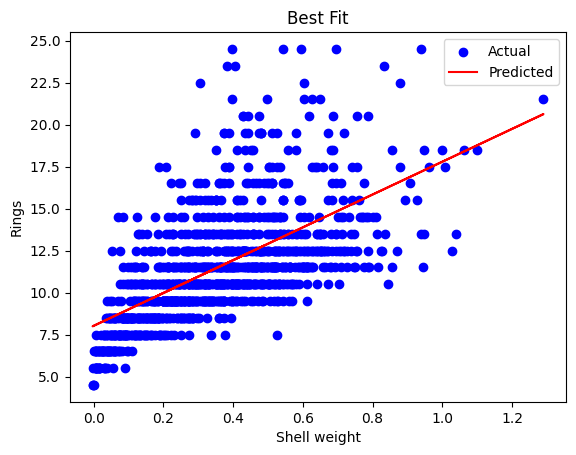

In [21]:
#Plot Best Fit graph between Whole Weight and Rings
plt.title("Best Fit")
plt.xlabel("Shell weight")
plt.ylabel("Rings")
plt.scatter(X_test_Shell_weight, y_test_Rings , color='blue', label='Actual')
plt.plot(X_test_Shell_weight, Predict_Data , color='red', label='Predicted')
plt.legend()
plt.show()

The prediction accuracy(Loss) on the training and test using mean squared error(MSE) and R²(See How close is the data predicted ring is close to actual ring)

In [22]:
TestLoss = mean_squared_error(y_test_Rings, Predict_Data)
TestMAE =mean_absolute_error(y_test_Rings, Predict_Data)
TestAcc = r2_score(y_test_Rings, Predict_Data)

print("Test Data Loss for Linear Regression is:  %.3f" % (TestLoss))
print("Test Data Mean Absolute Error for Linear Regression is:  %.3f" % (TestMAE))
print("Test Data R² for Linear Regression is:  %.3f" % (TestAcc))

Test Data Loss for Linear Regression is:  6.095
Test Data Mean Absolute Error for Linear Regression is:  1.821
Test Data R² for Linear Regression is:  0.400


scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data

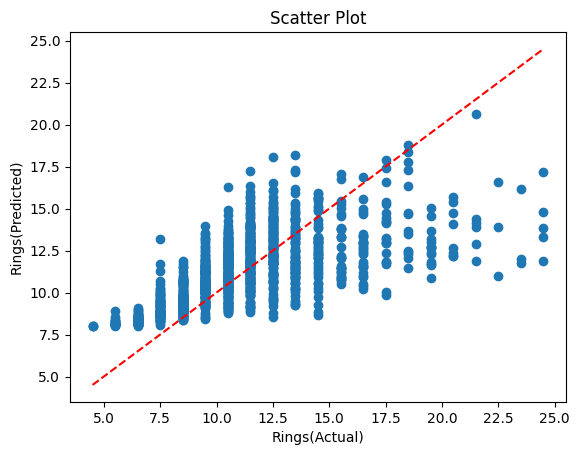

In [23]:
plt.title("Scatter Plot")
plt.xlabel("Rings(Actual)")
plt.ylabel("Rings(Predicted)")
plt.scatter(y_test_Rings, Predict_Data)
plt.plot([min(y_test_Rings), max(y_test_Rings)], [min(y_test_Rings), max(y_test_Rings)], 'r--')
plt.show()

#Multiple Linear Regression

Since all the feature correlation to the Ring, I will use all the feture to train the model

In [24]:
#Use Rings as f(x)
y_train_Rings = np.array(y_train+1.5).reshape(-1,1)

#Use Rings as f(x)
y_test_Rings = np.array(y_test+1.5).reshape(-1,1)

#train the model
#Use all the feature
ML_regressor = LinearRegression()
ML_regressor.fit(X_train , y_train_Rings)

# Predict the rings
ML_Predict_trainData = ML_regressor.predict(X_train)
ML_Predict_Data = ML_regressor.predict(X_test)

prediction accuracy(Loss) on the training and test using mean squared error(MSE) and R²(See How close is the data predicted ring is close to actual ring)

In [25]:
TrainLoss = mean_squared_error(y_train_Rings, ML_Predict_trainData)
TrainMAE =mean_absolute_error(y_train_Rings, ML_Predict_trainData)
TrainAcc = r2_score(y_train_Rings, ML_Predict_trainData)

print("Train Data Loss for Multiple Linear Regression is:  %.3f" % (TrainLoss))
print("Train Data Mean Absolute Error for Multiple Linear Regression is:  %.3f" % (TrainMAE))
print("Train Data R² for Multiple Linear Regression is:  %.3f" % (TrainAcc))

Train Data Loss for Multiple Linear Regression is:  4.642
Train Data Mean Absolute Error for Multiple Linear Regression is:  1.566
Train Data R² for Multiple Linear Regression is:  0.539


In [26]:
TestLoss = mean_squared_error(y_test_Rings, ML_Predict_Data)
TestMAE =mean_absolute_error(y_test_Rings, ML_Predict_Data)
TestAcc = r2_score(y_test_Rings, ML_Predict_Data)

print("Test Data Loss for Multiple Linear Regression is:  %.3f" % (TestLoss))
print("Test Data Mean Absolute Error for Multiple Linear Regression is:  %.3f" % (TestMAE))
print("Test Data R² for Multiple Linear Regression is:  %.3f" % (TestAcc))

Test Data Loss for Multiple Linear Regression is:  4.883
Test Data Mean Absolute Error for Multiple Linear Regression is:  1.605
Test Data R² for Multiple Linear Regression is:  0.519


scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data

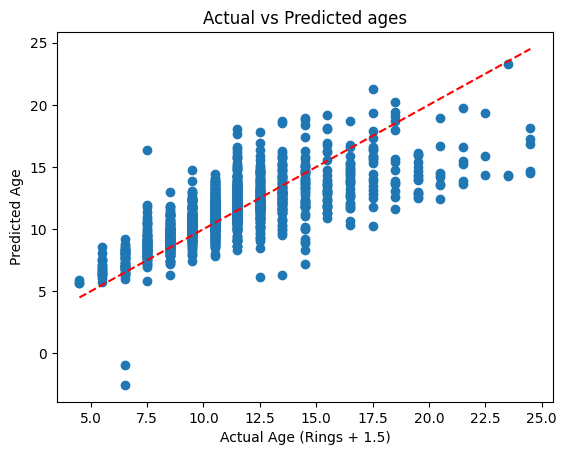

In [27]:
plt.title("Scatter Plot")
plt.xlabel("Actual Age (Rings + 1.5)")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted ages")
plt.scatter(y_test_Rings, ML_Predict_Data)
plt.plot([min(y_test_Rings), max(y_test_Rings)], [min(y_test_Rings), max(y_test_Rings)], 'r--')
plt.show()

In [28]:
print(ML_regressor.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Overall Evaluation



*   Multiple Linear Regression has a lower prediction error compared to simple Linear Regression

*   Multiple Linear Regression have a lower MAE, predictions closer to actual compare to simple Linear Regression
    *   This mean it predition is closer to the actual Value

*   Multiple Linear Regression have a higher score than simple Linear Regression, indicating it explains more of the variance in Rings

*   From this ,Multiple Linear Regression model is the better choice.


However, even though it perform better, it’s still moderately accurate,with an average prediction error of 1.605 rings and  about 51.9% of the variance in Rings.